# Bribery Corrruption Prediction

### About Dataset
This dataset contains information about the bribes taken from public.

- Title : The title of the complaints posted by citizens.
- Date : The date the complaint was posted
- Location : The Location where the incident took place.
- Department : The department which took the bribe.
- Views : Views of posted complaints
- Amount(INR) : The amount taken as bribery in indian Rupee.

### Step 1: Data Loading and Understanding

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [36]:
df = pd.read_csv('bribery.csv')
# Checking the top 5 rows of the dataset
display(df.head())
print('---'*30)

# Checking the last 5 rows of the dataset
display(df.tail())



,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,14-10-20,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,13-10-20,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,13-10-20,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,13-10-20,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,13-10-20,"Siwan,Bihar",FIR and Complaints,1068,15000


------------------------------------------------------------------------------------------


,Title,Date,Location,Department,Views,Amount(INR)
3468,"I Paid Rs. 33 to Commercial Tax, Sales Tax, VA...",30-10-15,"Abohar,Punjab",C Form,2511,33
3469,I Paid Rs. 10 to Municipal Services in Jabalpur.,30-10-15,"Jabalpur,MadhyaPradesh",Birth Certificate,3985,10
3470,I Paid Rs. 500 to Income Tax in Hingoli.,30-10-15,"Hingoli,Maharashtra",New PAN Card,2733,500
3471,I Paid Rs. 800 to Municipal Services in Achhnera.,30-10-15,"Achhnera,UttarPradesh",Birth Certificate,2475,800
3472,I Paid Rs. 16000 to Municipal Services in Mumbai.,29-10-15,"Mumbai,Maharashtra",Birth Certificate,1889,16000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        3473 non-null   object
 1   Date         3473 non-null   object
 2   Location     3473 non-null   object
 3   Department   3429 non-null   object
 4   Views        3473 non-null   int64 
 5   Amount(INR)  3473 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 162.9+ KB


None

------------------------------------------------------------------------------------------
(3473, 6)
The dataset has 3473 rows and 6 columns
------------------------------------------------------------------------------------------
Title           0
Date            0
Location        0
Department     44
Views           0
Amount(INR)     0
dtype: int64


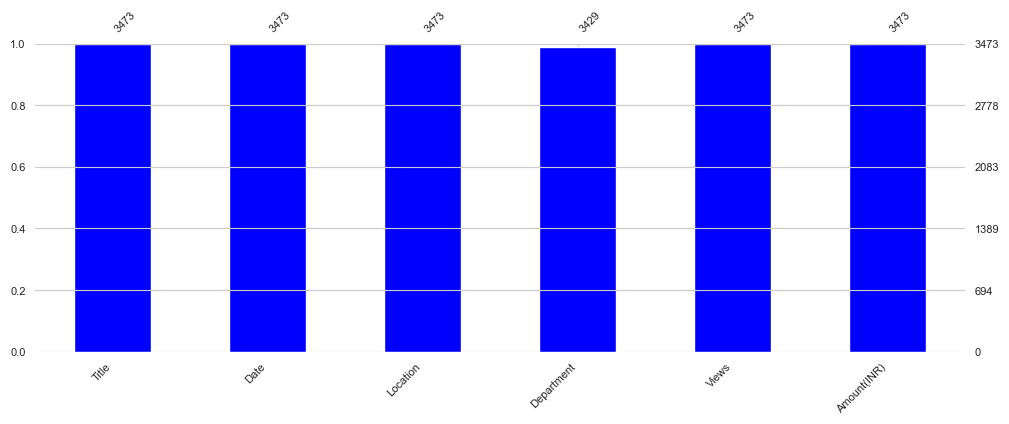

------------------------------------------------------------------------------------------


,Views,Amount(INR)
count,3473.000000,3.473000e+03
mean,3379.405701,3.331083e+04
std,1540.854884,1.508203e+05
min,463.000000,1.000000e+00
25%,2081.000000,3.300000e+02
50%,3272.000000,1.200000e+03
75%,4522.000000,8.000000e+03
max,20450.000000,2.185000e+06


------------------------------------------------------------------------------------------


,Title,Date,Location,Department
count,3473,3473,3473,3429
unique,3282,1334,510,367
top,Passport verification,07-11-15,"Bangalore,Karnataka",Others
freq,10,37,769,472


------------------------------------------------------------------------------------------
60
The dataset has 60 duplicates


In [37]:
# Checking the data info of all the columns
display(df.info())
print('---'*30)

# Checking the shape of the dataset
print(df.shape)
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print('---'*30)

# Checking the missing values in the dataset

print(df.isnull().sum())
import missingno as msno

plt.figure(figsize=(12,4))

msno.bar(df, figsize=(12,4), color='blue', fontsize=8, labels=True)

plt.show()
print('---'*30)

# Checking for the Numerical description of the dataset
display(df.describe())
print('---'*30)

# Checking for the categorical description of the dataset
display(df.describe(include='object'))
print('---'*30)

# checking for duplicates in the dataset
print(df.duplicated().sum())
print(f'The dataset has {df.duplicated().sum()} duplicates')


### Step 2: Data cleaning/Wrangling

In [38]:
# Missing values
df['Department'].fillna('bfill', inplace=True)

In [39]:
df.isnull().sum()

Title          0
Date           0
Location       0
Department     0
Views          0
Amount(INR)    0
dtype: int64

In [40]:
# Date column

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Title,Date,Location,Department,Views,Amount(INR)
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000


In [41]:
# Splitting the Location
df[['state', 'city']] = df['Location'].str.split(',', expand=True)

In [42]:
df.head()

,Title,Date,Location,Department,Views,Amount(INR),state,city
0,They said it is registration fee for birth cer...,2020-10-14,"Bangalore,Karnataka","Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,2020-10-13,"Bangalore,Karnataka",Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,2020-10-13,"Bangalore,Karnataka",Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,"Bangalore,Karnataka",Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,2020-10-13,"Siwan,Bihar",FIR and Complaints,1068,15000,Siwan,Bihar


In [43]:
# Dropping the location column

df.drop('Location', axis=1, inplace=True)
df.head()

,Title,Date,Department,Views,Amount(INR),state,city
0,They said it is registration fee for birth cer...,2020-10-14,"Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,2020-10-13,Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,2020-10-13,Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,2020-10-13,FIR and Complaints,1068,15000,Siwan,Bihar


### Step 3: EDA

In [44]:
df.head()

,Title,Date,Department,Views,Amount(INR),state,city
0,They said it is registration fee for birth cer...,2020-10-14,"Births, Family and Care",1225,400,Bangalore,Karnataka
1,Paid bribe for not having insurance during pan...,2020-10-13,Vehicle Insurance,1158,350,Bangalore,Karnataka
2,Forced to pay bribe at KR Puram RTO,2020-10-13,Driving and Transport Business,1249,100,Bangalore,Karnataka
3,Forced to pay 100 rupees bribe for LL test,2020-10-13,Driving Licenses and Tests,1044,100,Bangalore,Karnataka
4,Misusing of power and traping people in false ...,2020-10-13,FIR and Complaints,1068,15000,Siwan,Bihar


#### 
- Relationship between views and amount

<AxesSubplot:xlabel='Amount(INR)', ylabel='Views'>

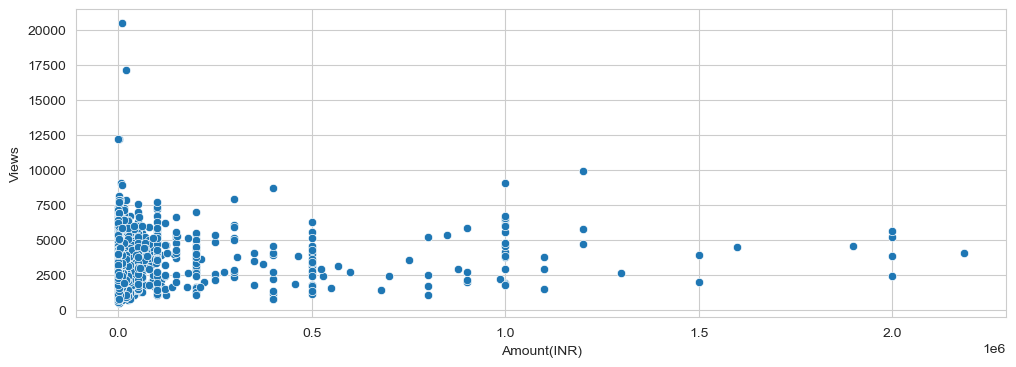

In [45]:
plt.figure(figsize=(12,4))
sns.scatterplot(x=df['Amount(INR)'], y=df['Views'])

In [46]:
# Extracting the month, year, and day from the date column
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['Day'] = df['Date'].dt.day

In [47]:
df.head(2)

,Title,Date,Department,Views,Amount(INR),state,city,Year,Month,Day
0,They said it is registration fee for birth cer...,2020-10-14,"Births, Family and Care",1225,400,Bangalore,Karnataka,2020,10,14
1,Paid bribe for not having insurance during pan...,2020-10-13,Vehicle Insurance,1158,350,Bangalore,Karnataka,2020,10,13


In [48]:
# Bribe collected over the years
amount_by_date = df.groupby('Year')['Amount(INR)'].sum().reset_index()
amount_by_date

,Year,Amount(INR)
0,2015,3931905
1,2016,30944585
2,2017,10649136
3,2018,18902211
4,2019,37493268
5,2020,13767420


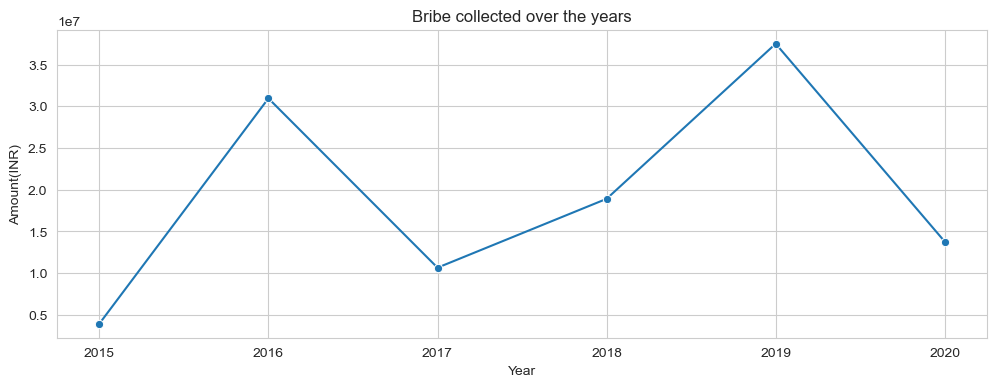

In [49]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Year', y='Amount(INR)', data=amount_by_date, marker='o')
plt.title('Bribe collected over the years')
plt.grid(True)

In [50]:
# Bribe collected over the months
amount_by_month = df.groupby('Month')['Amount(INR)'].sum().reset_index()
amount_by_month

,Month,Amount(INR)
0,1,6514229
1,2,7592037
2,3,9812713
3,4,6236596
4,5,10596853
5,6,6208249
6,7,8635138
7,8,9693855
8,9,9373083
9,10,13207694


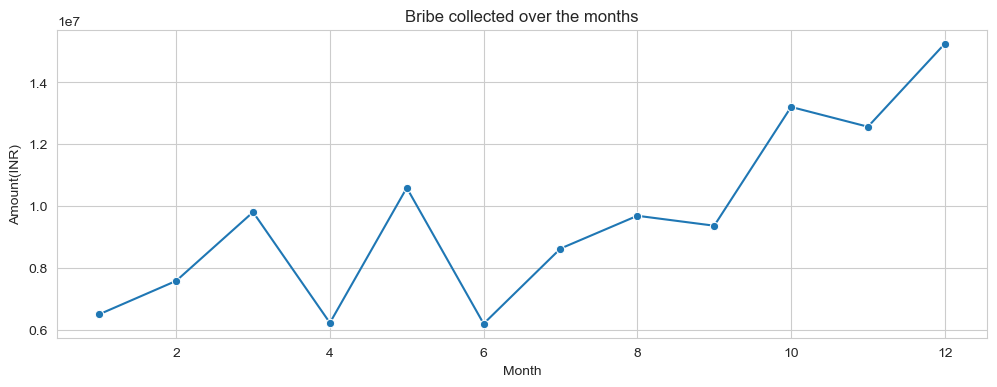

In [51]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Month', y='Amount(INR)', data=amount_by_month, marker='o')
plt.title('Bribe collected over the months')
plt.grid(True)

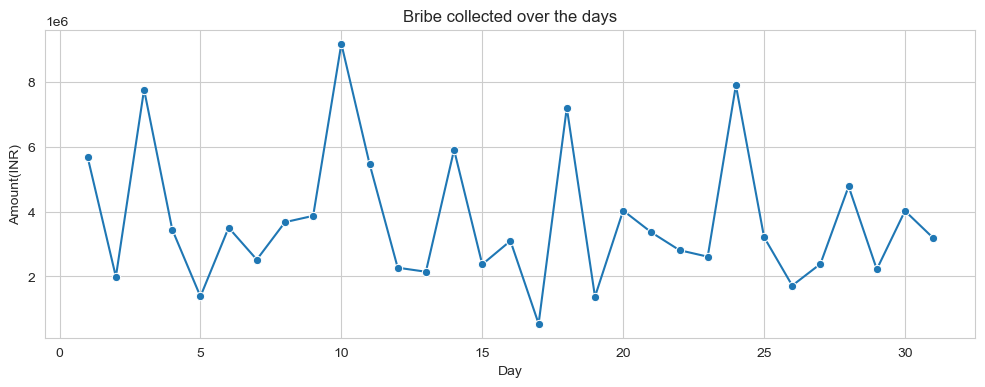

In [52]:
# Bribe collected per day
amount_by_day = df.groupby('Day')['Amount(INR)'].sum().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(x='Day', y='Amount(INR)', data=amount_by_day, marker='o')
plt.title('Bribe collected over the days')
plt.grid(True)

(-0.5, 1199.5, 399.5, -0.5)

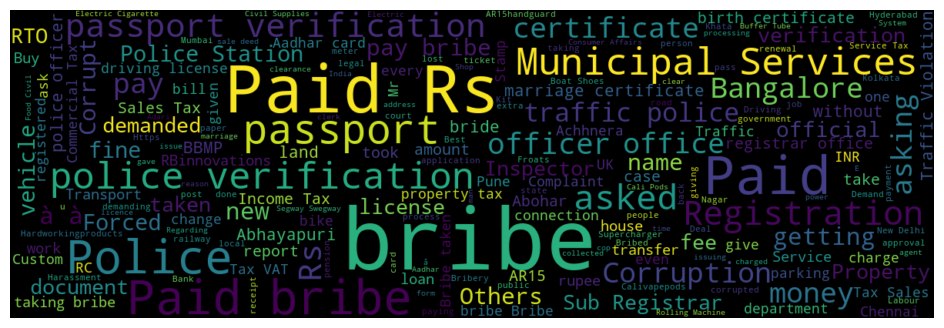

In [53]:
# Title column display using WordCloud
from wordcloud import WordCloud
plt.figure(figsize=(12,4))

wordcloud = WordCloud(width=1200, height=400, random_state=21, max_font_size=110).generate(' '.join(df['Title']))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')